# Mall Customer Segmentation Project

In [1]:
# importing required Libraries
import numpy as np 
import pandas as pd                                         # to create dataframe
import matplotlib.pyplot as plt                             # for plotting
import seaborn as sns                                       # for plotting
from sklearn import preprocessing 
from sklearn.preprocessing import StandardScaler            # Scaling
import warnings
warnings.filterwarnings('ignore')                           # for ignoring warning and not displaying it
from sklearn.cluster import KMeans                          # Kmeans clustering model
from sklearn.cluster import AgglomerativeClustering         # Agglomerative clustering model
from sklearn.cluster import DBSCAN                          # DBSCAN clustering model

In [2]:
# loading Bank data in bank variable
mall=pd.read_csv('DS3_C6_S3_MallCustomers_Data_Project.csv') #loading file
mall                                                          # display

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
#Shape of data
mall.shape

(200, 5)

In [4]:
# Data column, null value ,count and type displayed by info function 
mall.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [5]:
# Idf data Statistical values displayed through describe function
mall.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


# Data Prepration

# Missing value imputation

In [6]:
# Identifying missing or null values
mall.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no missing values.

# Data Exploration

In [7]:
# grouping according to the type of column categorical and numerical
cat=[]
num=[]
for i in mall.columns:  #loop for iterating each column
    if mall[i].nunique()<40:
        cat.append(i)   # adding column to list cat
    else:
        num.append(i)   # adding column to list num

In [8]:
cat # categorical columns

['Gender']

In [9]:
num # numerical columns

['CustomerID', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

Customer id is the serial columns so we have to remove it and Age is the numerical column as it also have limited values but due to high limited values we are exploring it with numerical columns.

In [10]:
num.pop(0)

'CustomerID'

# Univariate Plots

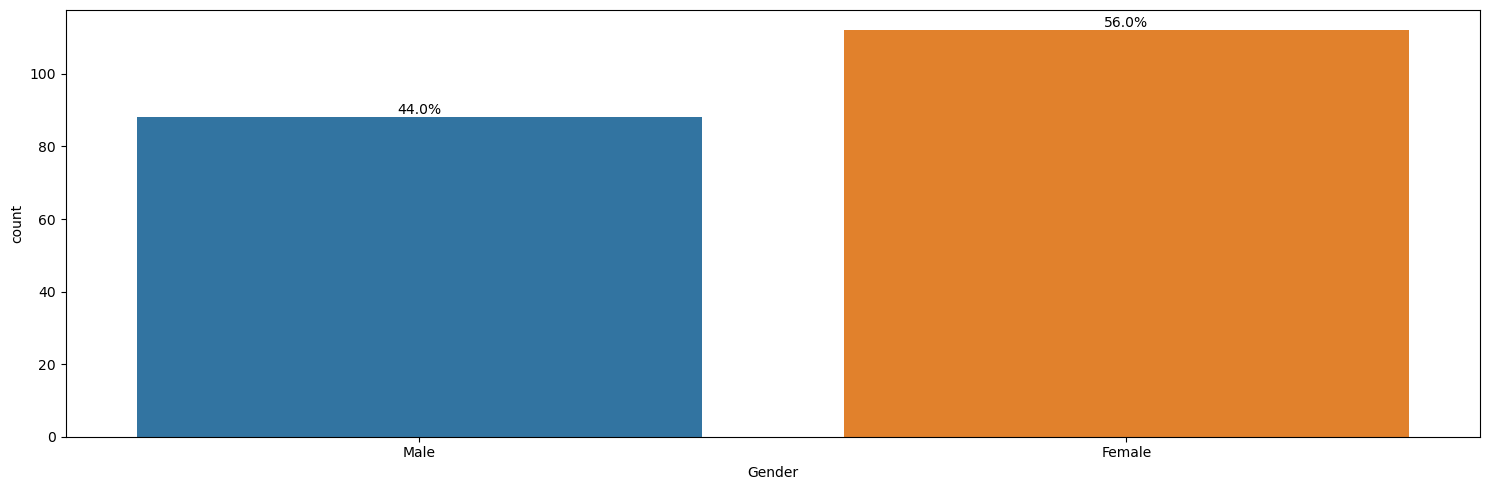

In [11]:
# Ploting according to count and each categorical column
cat_col='Gender'
fig,axs=plt.subplots(1,tight_layout=True,figsize=(15,5))
sns.countplot(data=mall,x=mall[cat_col])
for bar in axs.patches:
            percentage=f'{round(bar.get_height()/len(mall)*100,2)}%'
            x=bar.get_x()+bar.get_width()/2
            y=bar.get_height()
            axs.annotate(percentage,(x,y),va='bottom',ha='center');

As per the above figure we can observe that there are more number of females than man.

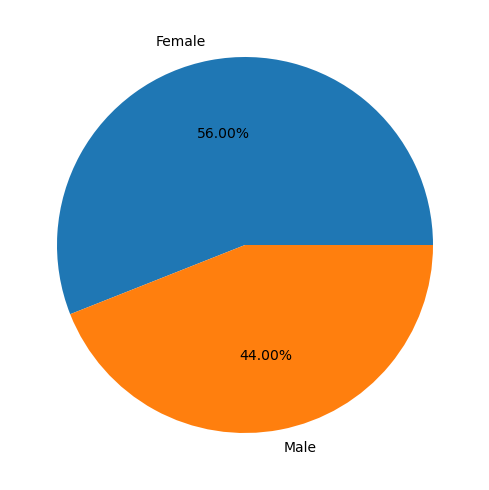

In [12]:
# Ploting pie chart according to each categorical column
fig,axs=plt.subplots(1,tight_layout=True,figsize=(15,5))
plt.pie(labels=mall['Gender'].value_counts().index,x=mall['Gender'].value_counts().values,autopct='%.2f%%');

As per the above figure we observed that females are 56% and male are 44% in total number of customers in mall.

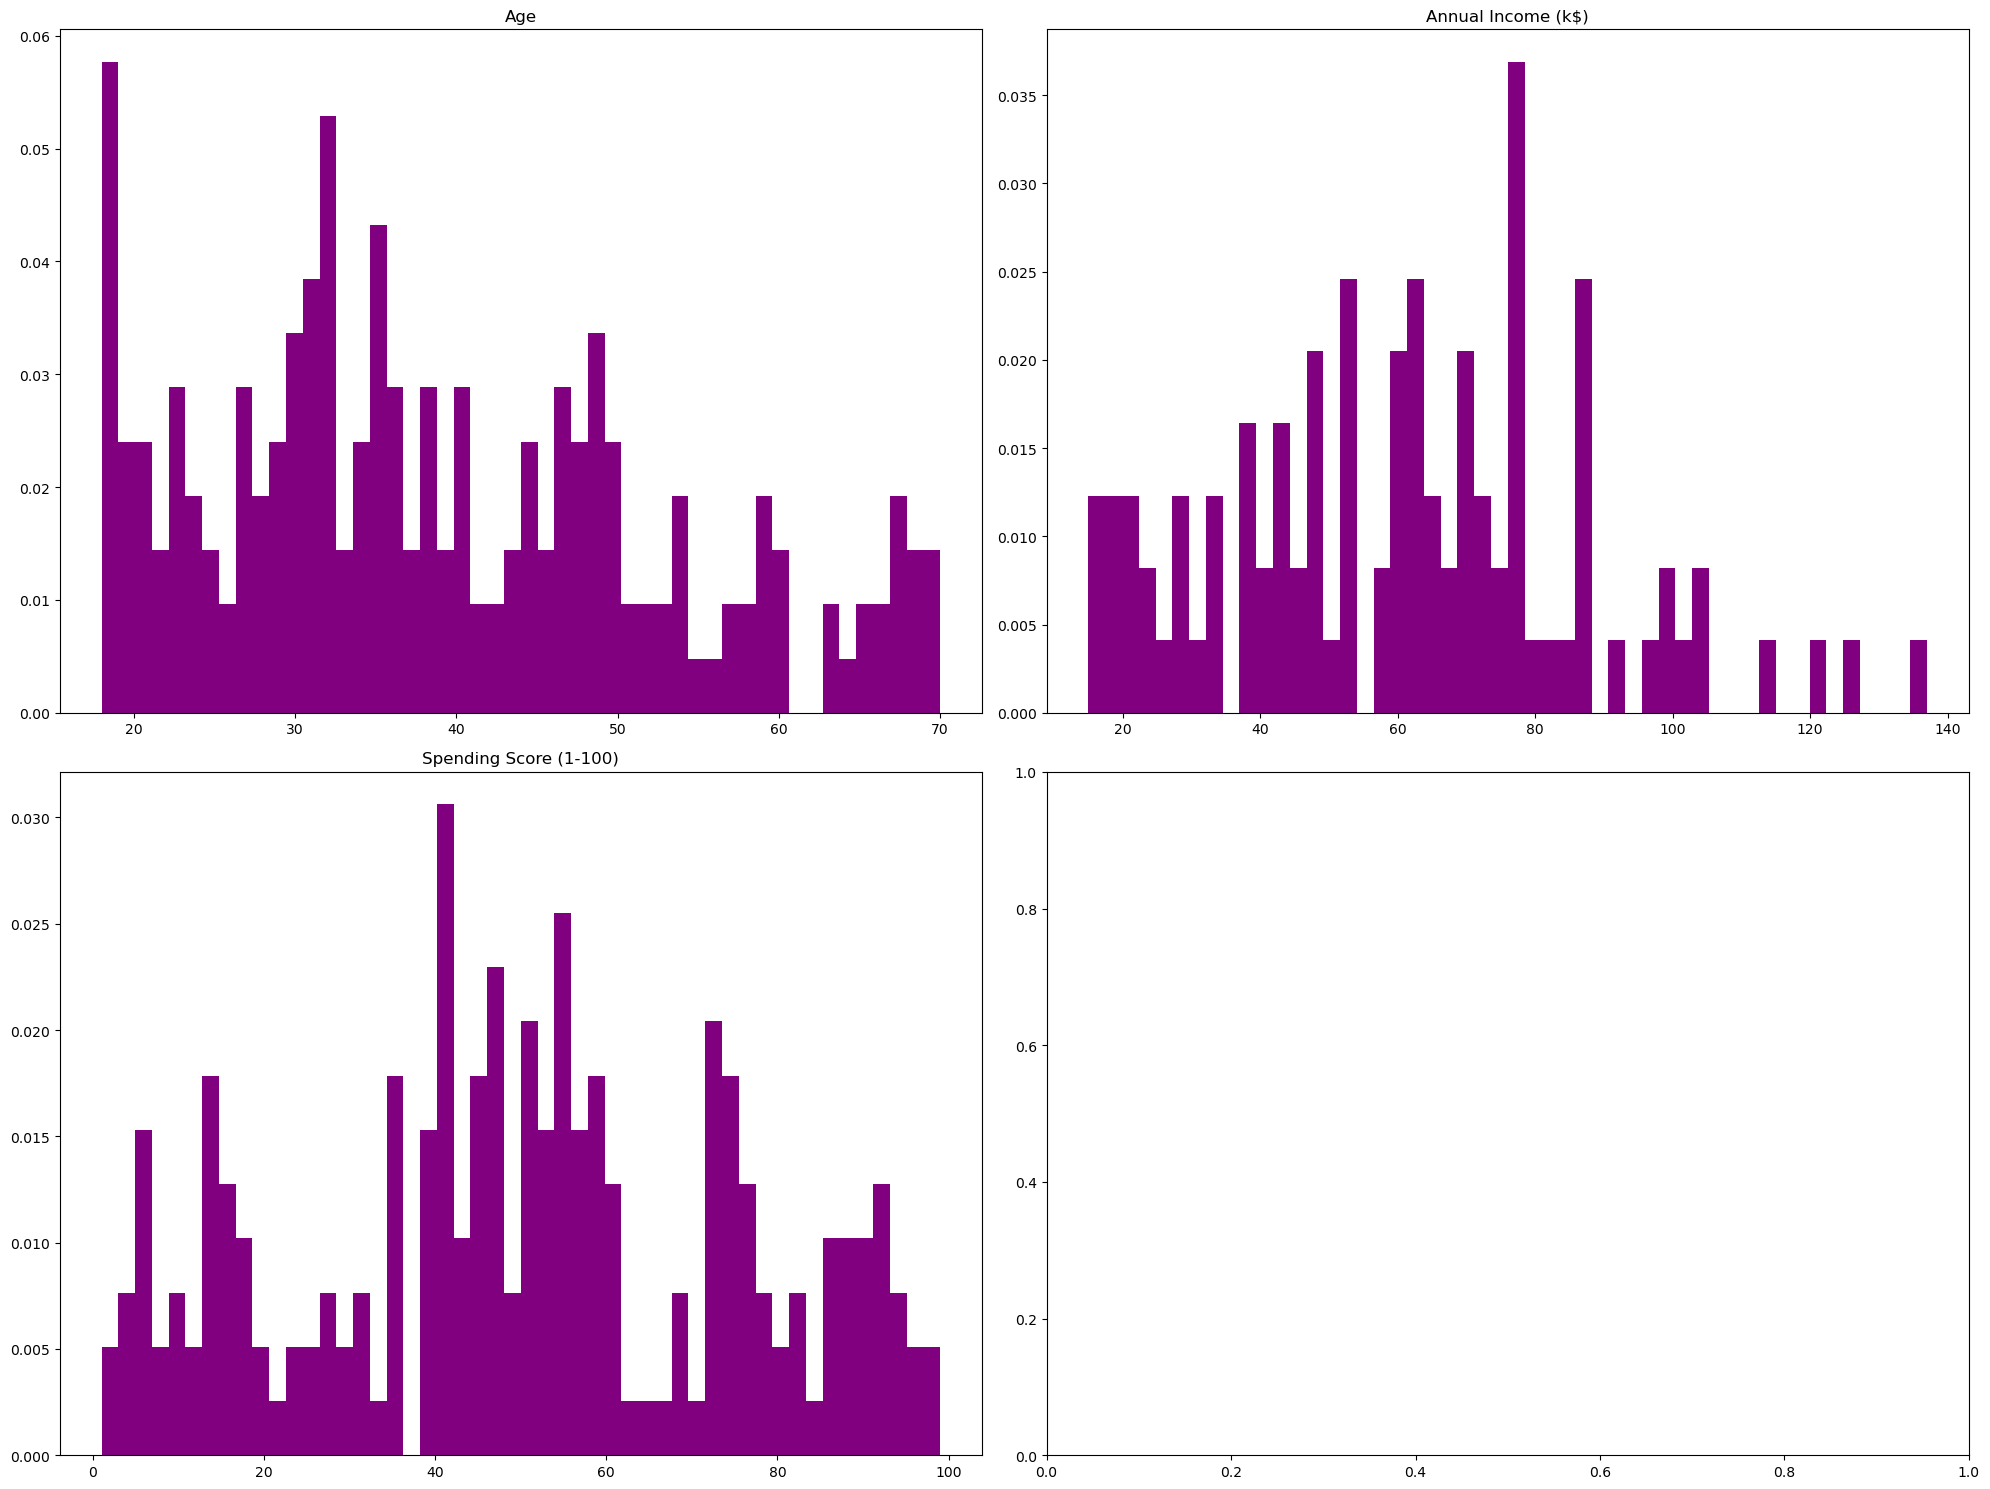

In [13]:
# Ploting histogram according to each categorical column
num_cols=num
num_col=2
n_bins=50
num_rows=int(len(num_cols)/num_col)+1
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(20,15))
for col,axs in zip (num_cols,axs.flatten()[:len(num_cols)]):    #zipping the categorical each column with their values
    axs.hist(mall[col],bins=n_bins,density=True,color='purple')
    axs.set_title(col)
plt.show()

We can conclude from histogram that all the data columns are normally distributed.

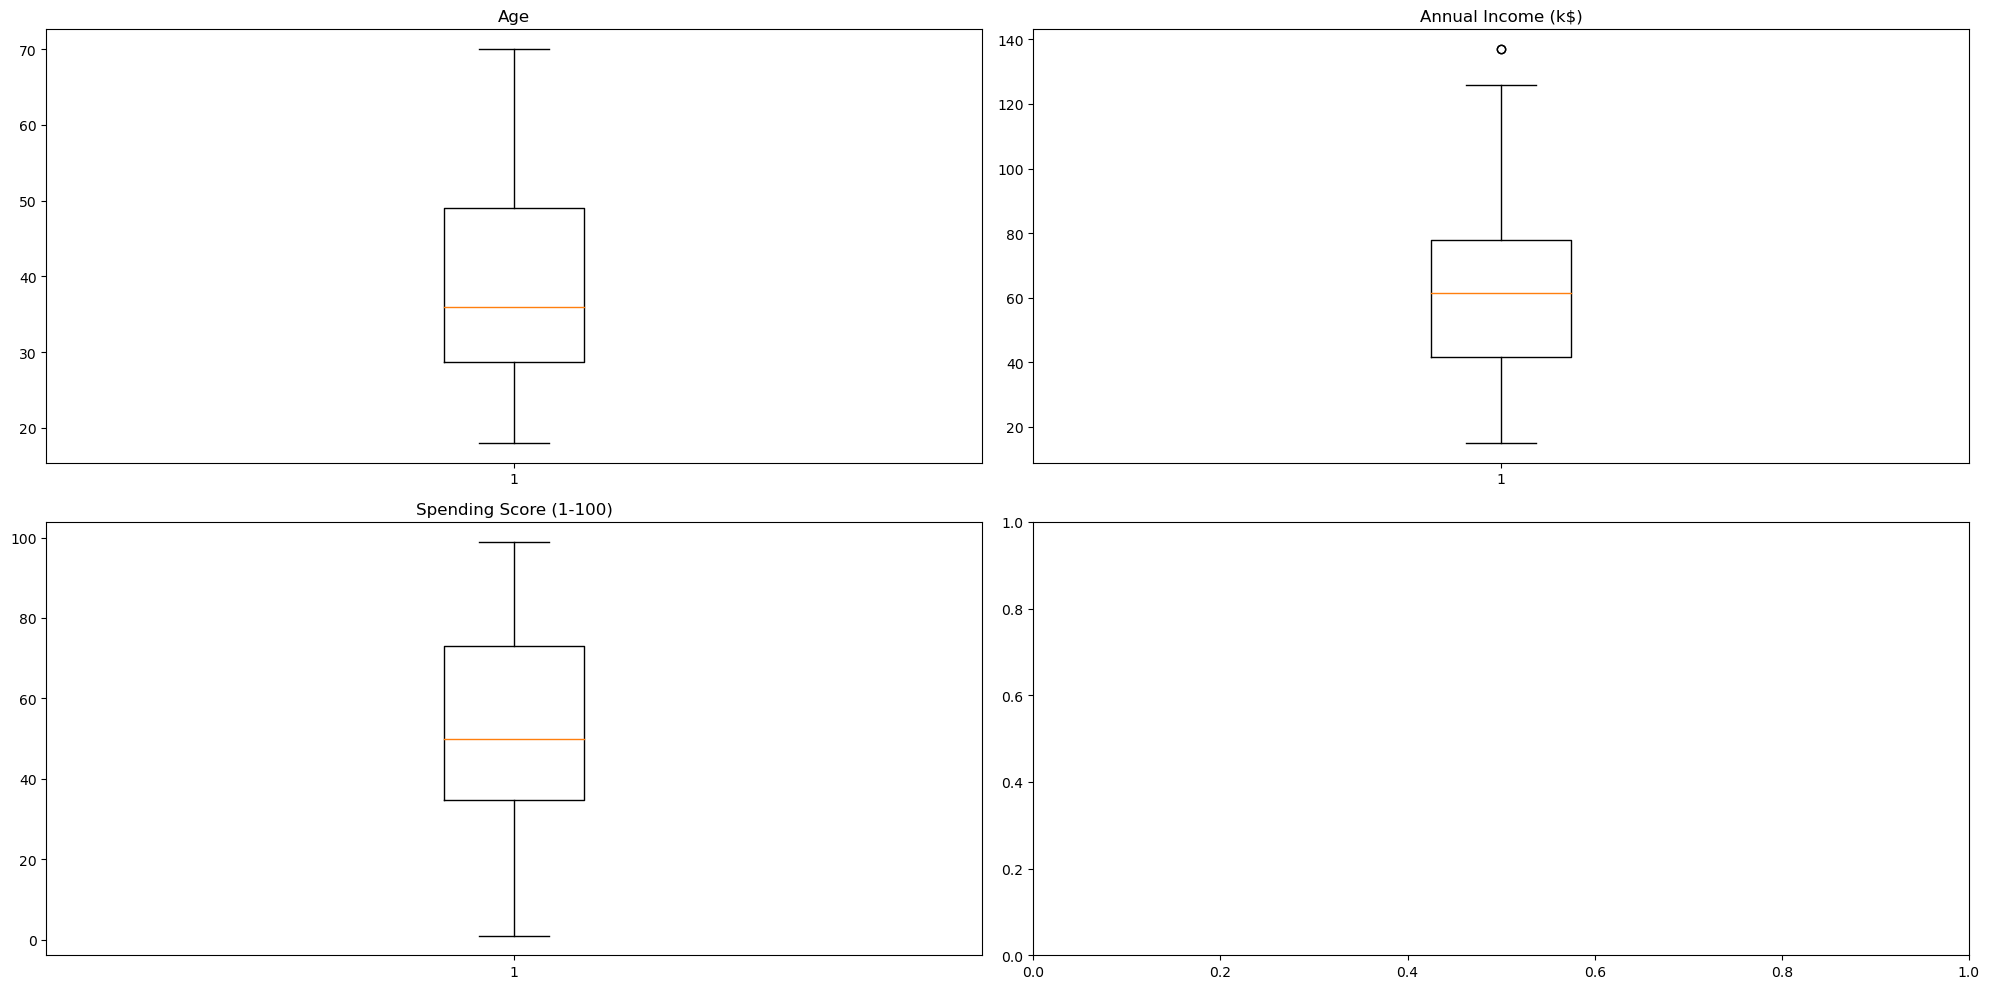

In [14]:
# Ploting box plot according to each categorical column
num_cols=num
num_col=2
num_rows=int(len(num_cols)/num_col)+1
fig,axs=plt.subplots(num_rows,num_col,tight_layout=True,figsize=(20,10))
for col,axs in zip (num_cols,axs.flatten()[:len(num_cols)]):         #zipping the categorical each column with their values
    axs.boxplot(mall[col])
    axs.set_title(col)
plt.show()

Here we can see that we have one outlier in annual income. age and annual income data is right skewed.

# Bivarriate Plots

In [15]:
num

['Age', 'Annual Income (k$)', 'Spending Score (1-100)']

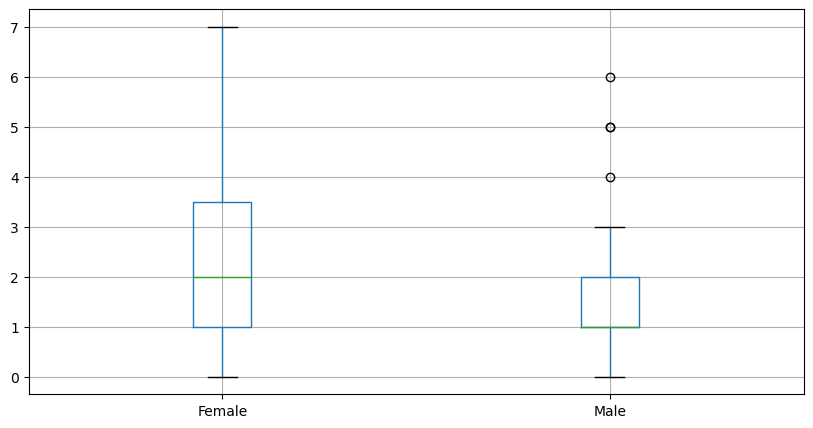

In [16]:
# Ploting boxplot with categorical column
ax=pd.crosstab(mall['Age'],mall['Gender']).boxplot(figsize=(10,5))

Female data is right skewed and male data have outliers.

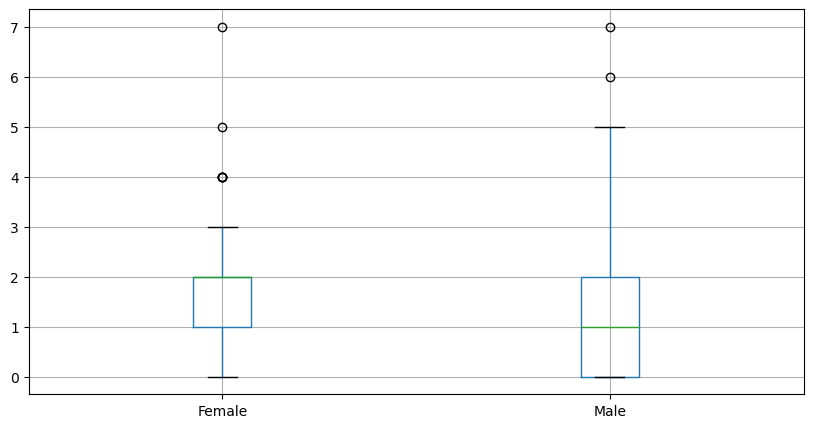

In [17]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(mall['Annual Income (k$)'],mall['Gender']).boxplot(figsize=(10,5))

In annual income Male data is right skeewed and we have outliers in both.

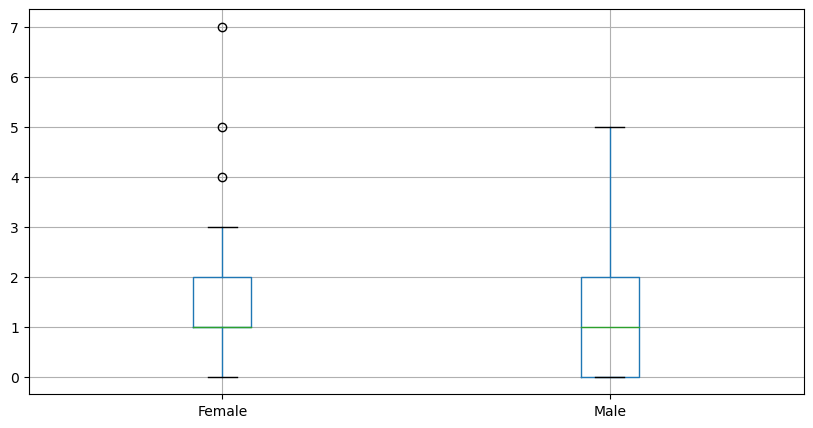

In [18]:
# Ploting boxplot with one categorical column
ax=pd.crosstab(mall['Spending Score (1-100)'],mall['Gender']).boxplot(figsize=(10,5))

As per spending score Male data is right skeewed and we have outliers in female spending score.

# Multivariate Plots

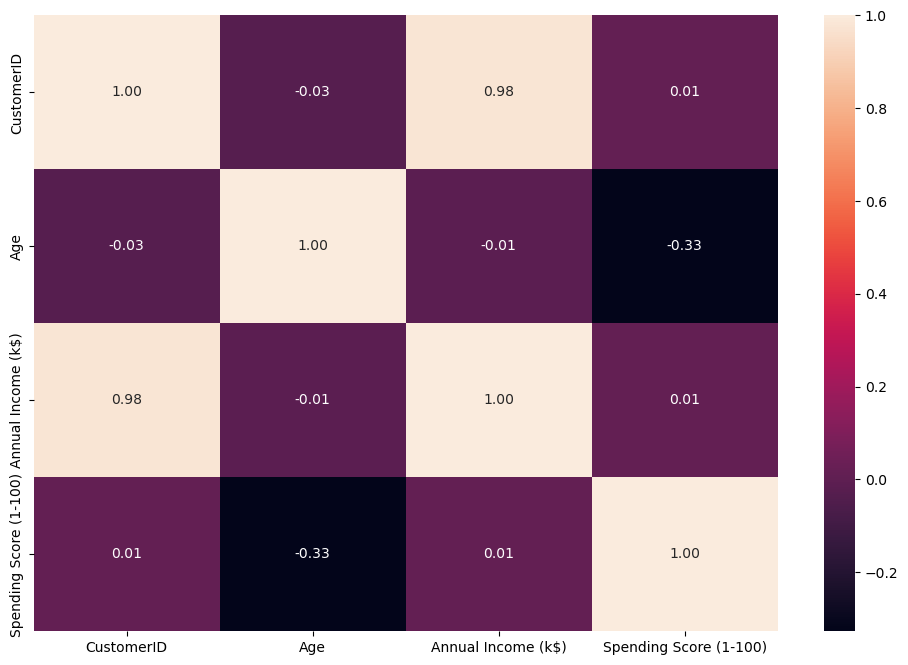

In [19]:
# Ploting heatmap
plt.figure(figsize=(12,8))
sns.heatmap(mall.corr(),annot=True,fmt='.2f');

Mainly Age column have negative correlation with spending score and others are neutral.

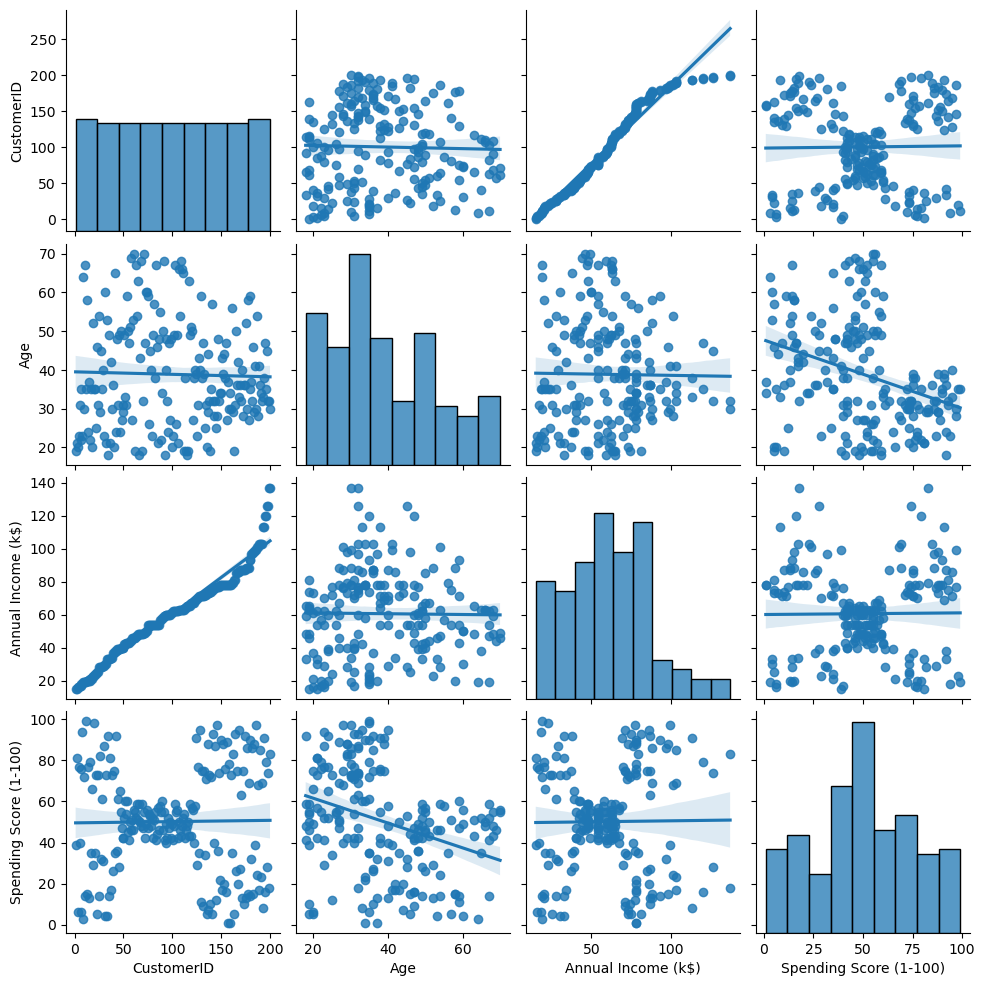

In [20]:
# Ploting pairplot which have barchart and scatterplot
sns.pairplot(mall,kind='reg');

All the data are normally distributed except annual income and only one column that is age correlated with spending score other columns doesn't have any correlation.

# Data Prepration

# Feature engineering data transformation 

In [21]:
#Converting categorical data to numerical through label encoding 
lbl_end=preprocessing.LabelEncoder() # assigning variable to label encoding
mall['Gender']=lbl_end.fit_transform(mall['Gender'])   # encoding Gender column

In [22]:
x=mall.drop(columns=['CustomerID']) 

In [23]:
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,19,15,39
1,1,21,15,81
2,0,20,16,6
3,0,23,16,77
4,0,31,17,40
...,...,...,...,...
195,0,35,120,79
196,0,45,126,28
197,1,32,126,74
198,1,32,137,18


# Feature extraction

# PCA (Principal Component Analysis)

In [24]:
# Through different number of component finding out the variance ratio
from sklearn.decomposition import PCA
var_ratio={}
for i in range(2,5):   # loop for iterating number of components
    pca=PCA(n_components=i)
    pd_data1=pca.fit(x)
    var_ratio[i]=sum(pd_data1.explained_variance_ratio_)

In [25]:
var_ratio # Variance ratio

{2: 0.8920961624646062, 3: 0.9998418251271395, 4: 1.0000000000000002}

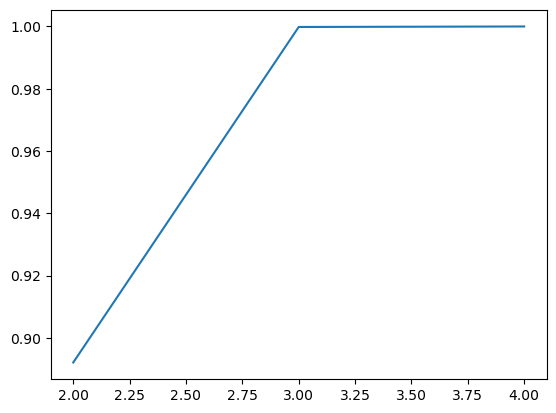

In [26]:
# Plotting of variance ratio as per number of components
pd.Series(var_ratio).plot(kind='line');

In [27]:
# Fitting and transforming data through Principal component analysis
pca=PCA(n_components=2)
pd_data1=pca.fit(x)
pd_data2=pca.fit_transform(x)

In [28]:
df=pd.DataFrame(pd_data2) # Dataframe after reducing columns through PCA

In [29]:
df

,0,1
0,-31.869945,-33.001252
1,0.764494,-56.842901
2,-57.408276,-13.124961
3,-2.168543,-53.478590
4,-32.174085,-30.388412
...,...,...
195,58.352515,31.017542
196,19.908001,66.446108
197,58.520804,38.346039
198,20.979130,79.376405


# We are not using PCA in model building data as we have very less number of features and all are important if we will use PCA in this data it will decrease our accuracy of model.

# Feature scaling

In [30]:
x=mall.drop(columns=['CustomerID','Gender']) 

In [31]:
# Scaling of data through Standard Scaler
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
scale=sc.fit_transform(x)
X=pd.DataFrame(scale,columns=x.columns)

In [32]:
X

,Age,Annual Income (k$),Spending Score (1-100)
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


In [33]:
X['Gender']= mall['Gender']

In [34]:
 X

,Age,Annual Income (k$),Spending Score (1-100),Gender
0,-1.424569,-1.738999,-0.434801,1
1,-1.281035,-1.738999,1.195704,1
2,-1.352802,-1.700830,-1.715913,0
3,-1.137502,-1.700830,1.040418,0
4,-0.563369,-1.662660,-0.395980,0
...,...,...,...,...
195,-0.276302,2.268791,1.118061,0
196,0.441365,2.497807,-0.861839,0
197,-0.491602,2.497807,0.923953,1
198,-0.491602,2.917671,-1.250054,1


# KMeans Model for Clustering

# Elbow Method

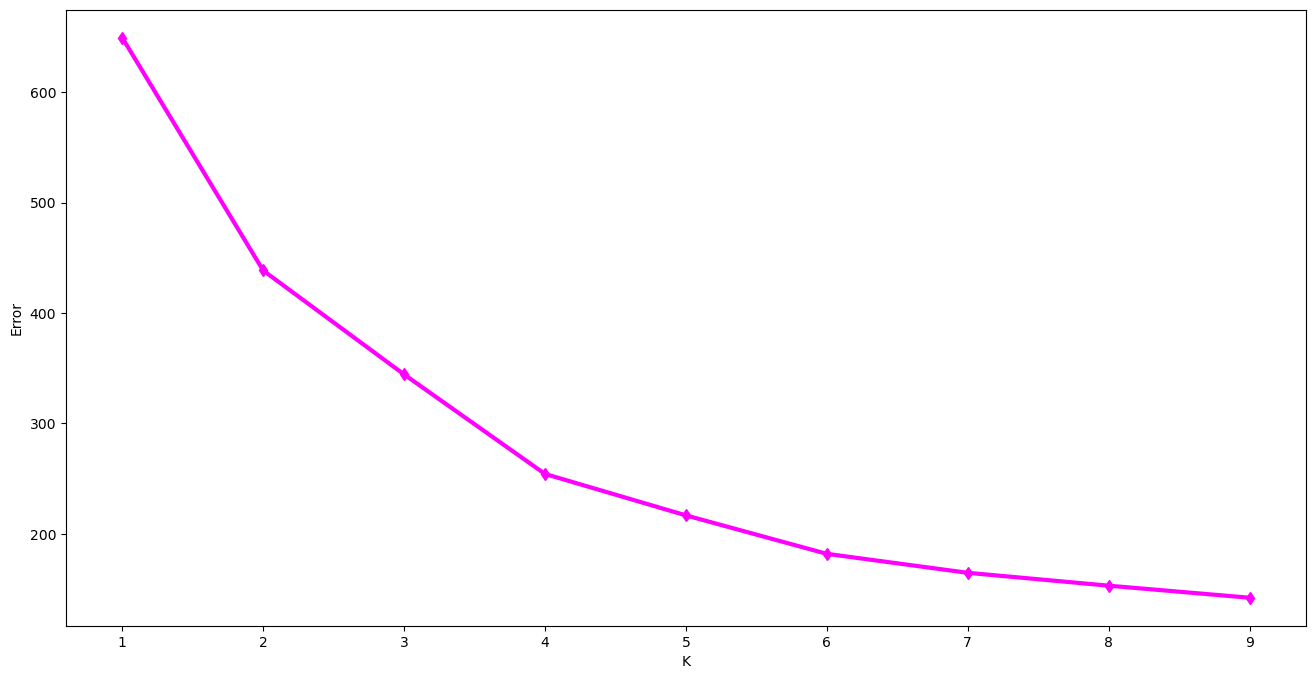

In [35]:
# Elbow Method
err=[]
for k in range(1,10):
    km=KMeans(n_clusters=k,init='k-means++',random_state=42)
    km.fit(X)
    err.append(km.inertia_)
fig=plt.figure(figsize=(16,8))
plt.plot(range(1,10),err,marker='d',color='magenta', linewidth=3)
plt.xlabel('K')
plt.ylabel('Error');

Through elbow method number of cluster or k value is equal to 6.

# silhouette_score Method

For n_clusters = 2 The average silhouette_score is : 0.3031976564160757
For n_clusters = 3 The average silhouette_score is : 0.31384595454509323
For n_clusters = 4 The average silhouette_score is : 0.3502702043465398
For n_clusters = 5 The average silhouette_score is : 0.34977050035201074
For n_clusters = 6 The average silhouette_score is : 0.356485834425401
For n_clusters = 7 The average silhouette_score is : 0.3359706123975697
For n_clusters = 8 The average silhouette_score is : 0.3322029599065154
For n_clusters = 9 The average silhouette_score is : 0.31025859487324325
For n_clusters = 10 The average silhouette_score is : 0.3191955986875477


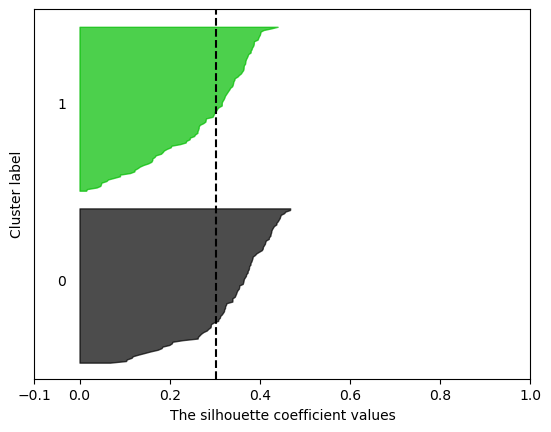

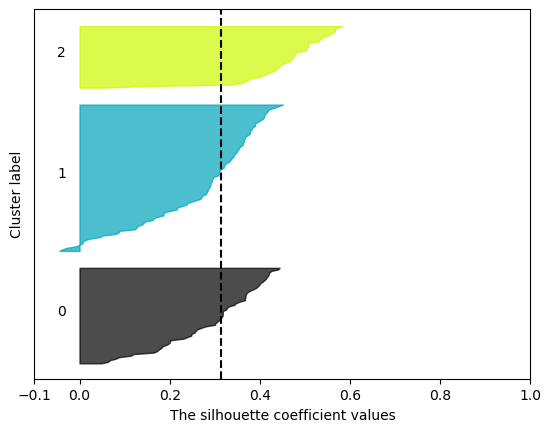

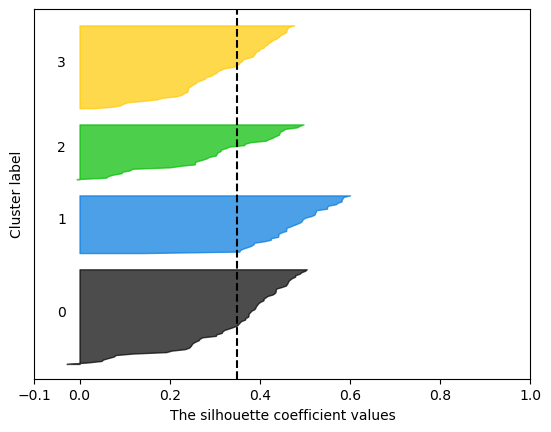

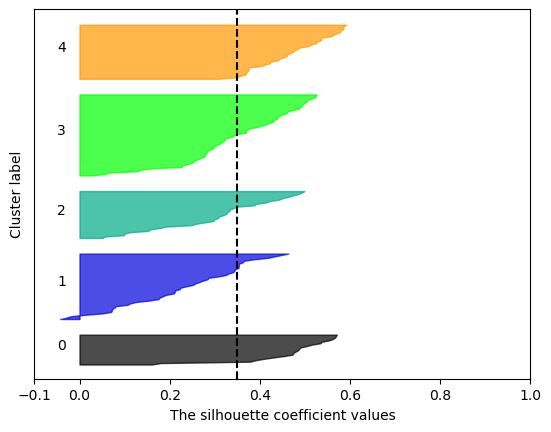

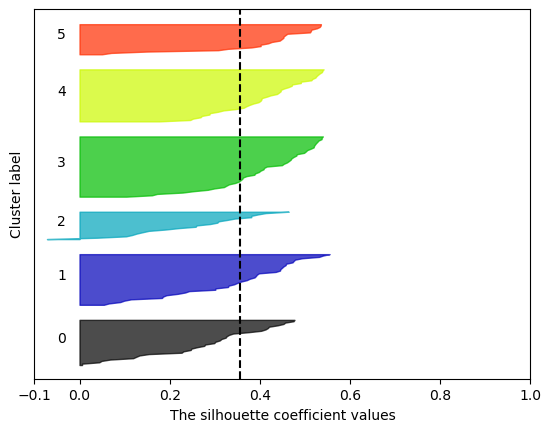

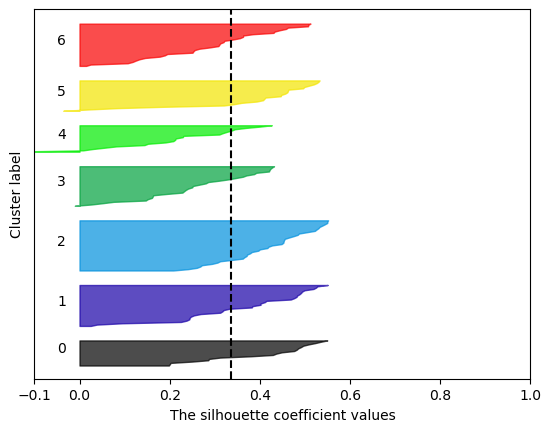

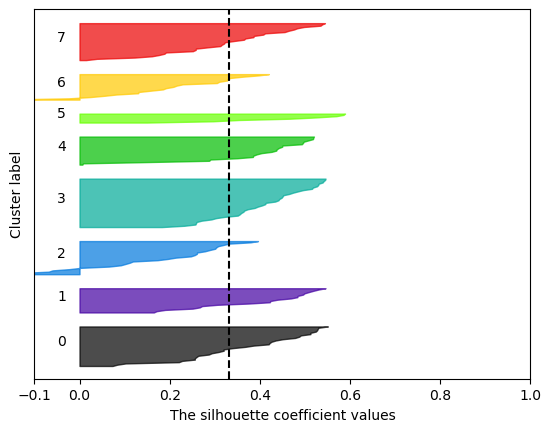

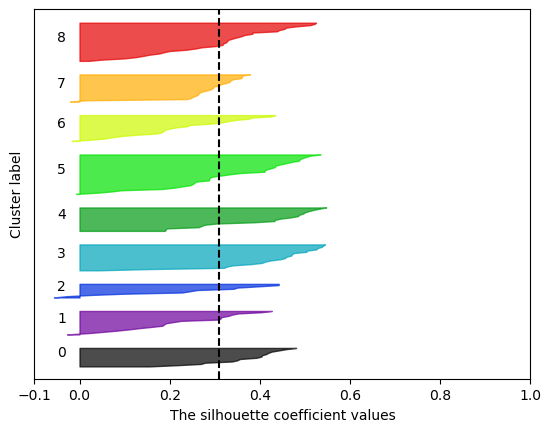

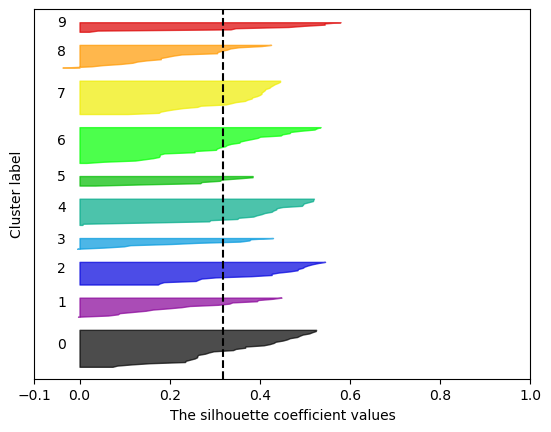

In [36]:
#optimum value of k using silhouette
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import numpy as np
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10]
for n_clusters in range_n_clusters:
 # Create a subplot with 1 row and 2 columns
    fig, ax1 = plt.subplots(1, 1)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,"The average silhouette_score is :", silhouette_avg)
 # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]
        ith_cluster_silhouette_values.sort()
        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),0, ith_cluster_silhouette_values,facecolor=color, edgecolor=color, alpha=0.7)
     # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
 # Compute the new y_lower for next plot
        y_lower = y_upper + 10 # 10 for the 0 samples
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
 # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="black", linestyle="--")
    ax1.set_yticks([]) # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
plt.show()


In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
for k in range(2,10):
    KM=KMeans(n_clusters=k,init='k-means++',random_state=42)
    y_km=KM.fit_predict(X) 
    print(k,silhouette_score(X,y_km))

2 0.3031976564160757
3 0.3142800845203407
4 0.3502702043465398
5 0.34977050035201074
6 0.356485834425401
7 0.3346555570188711
8 0.3367567190885339
9 0.332448045759479


Through silhouette method we found k value as 6.

In [38]:
# KMeans Clustering model
KM=KMeans(n_clusters=6,init='k-means++',random_state=42)
y_km=KM.fit_predict(X)
print(silhouette_score(X,y_km)*100)

35.6485834425401


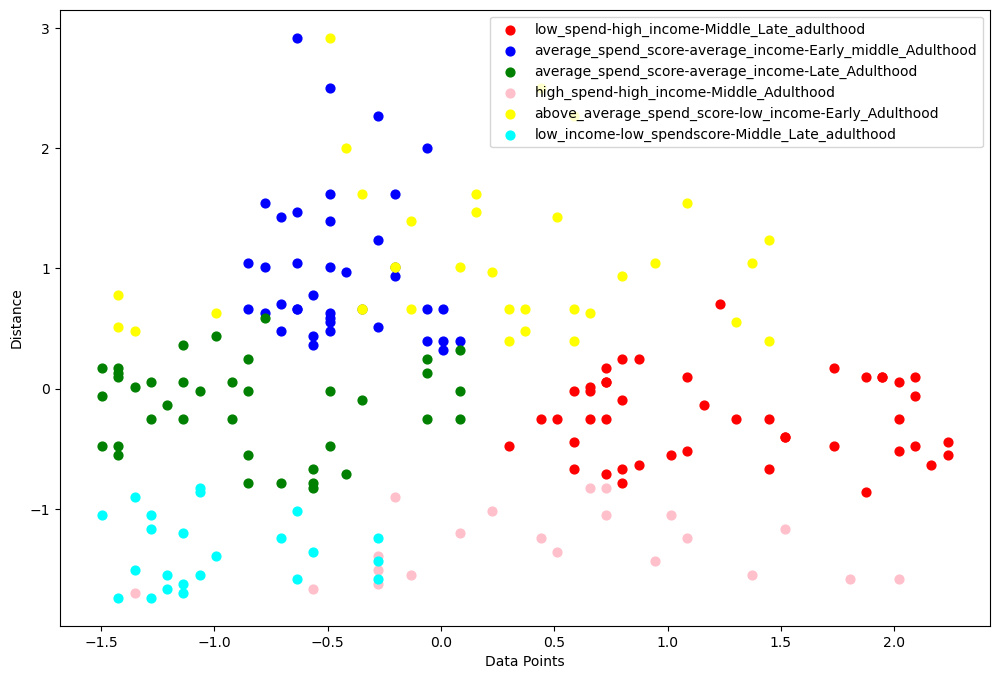

In [39]:
# Plotting Scatter plot
X=X.to_numpy()
plt.figure(figsize=(12,8))
plt.scatter(X[y_km==0,0],X[y_km==0,1],s=40,c='red',label='low_spend-high_income-Middle_Late_adulthood')
plt.scatter(X[y_km==1,0],X[y_km==1,1],s=40,c='blue',label='average_spend_score-average_income-Early_middle_Adulthood')
plt.scatter(X[y_km==2,0],X[y_km==2,1],s=40,c='green',label='average_spend_score-average_income-Late_Adulthood')
plt.scatter(X[y_km==3,0],X[y_km==3,1],s=40,c='pink',label='high_spend-high_income-Middle_Adulthood')
plt.scatter(X[y_km==4,0],X[y_km==4,1],s=40,c='yellow',label='above_average_spend_score-low_income-Early_Adulthood')
plt.scatter(X[y_km==5,0],X[y_km==5,1],s=40,c='cyan',label='low_income-low_spendscore-Middle_Late_adulthood')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Distance');

# Anglomerative Model for Clustering

# Dendogram

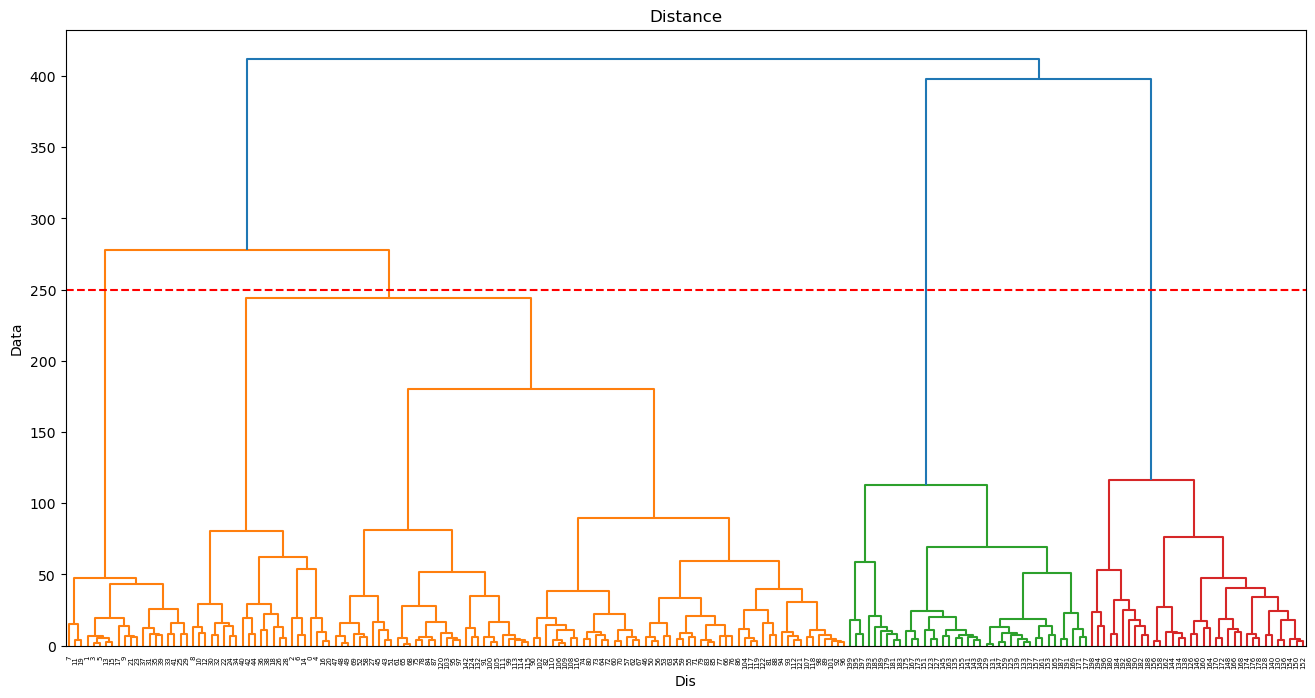

In [40]:
# Dendogram
import scipy.cluster.hierarchy as sch
plt.figure(figsize=(16,8))
sch.dendrogram(sch.linkage(x,method='ward'),labels=x.index)
plt.axhline(y=250,color='red',linestyle='--')
plt.title("Distance")
plt.xlabel("Dis")
plt.ylabel("Data")
plt.show()

Through dendogram with linkage as ward the number of clusters value is 6.

In [41]:
# Selecting number of clusters through silhoutte score comparision
from sklearn.metrics import silhouette_score
Linkage=['ward', 'complete', 'average', 'single']
for j in Linkage:
    for k in range(2,8):
        hc=AgglomerativeClustering(n_clusters=k,affinity='euclidean',linkage=j)
        y_hc=hc.fit_predict(X)
        print(j,k,silhouette_score(X,y_hc))

ward 2 0.2923040670626512
ward 3 0.30972453727559257
ward 4 0.3299052543211478
ward 5 0.3477559149875169
ward 6 0.3504439354681972
ward 7 0.31540515140480885
complete 2 0.20507935432314284
complete 3 0.19461994066369875
complete 4 0.241642272927867
complete 5 0.3404764937897312
complete 6 0.33892565082159215
complete 7 0.31109980258465664
average 2 0.2935468930616447
average 3 0.3022521726480174
average 4 0.3326718554376819
average 5 0.35123598270150214
average 6 0.33333991452459744
average 7 0.31537202202291614
single 2 0.23042519588412858
single 3 0.11180917042975475
single 4 0.03718689467429146
single 5 -0.044595243204717396
single 6 -0.07055257740831478
single 7 -0.09326014860280175


After comparing all the linkages the highest silhouette score is of average linkage with 5 as number of clusters.

In [42]:
# AgglomerativeClustering
from sklearn.cluster import AgglomerativeClustering
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='average')
y_hc=hc.fit_predict(X)  
print(silhouette_score(X,y_hc)*100)

35.12359827015021


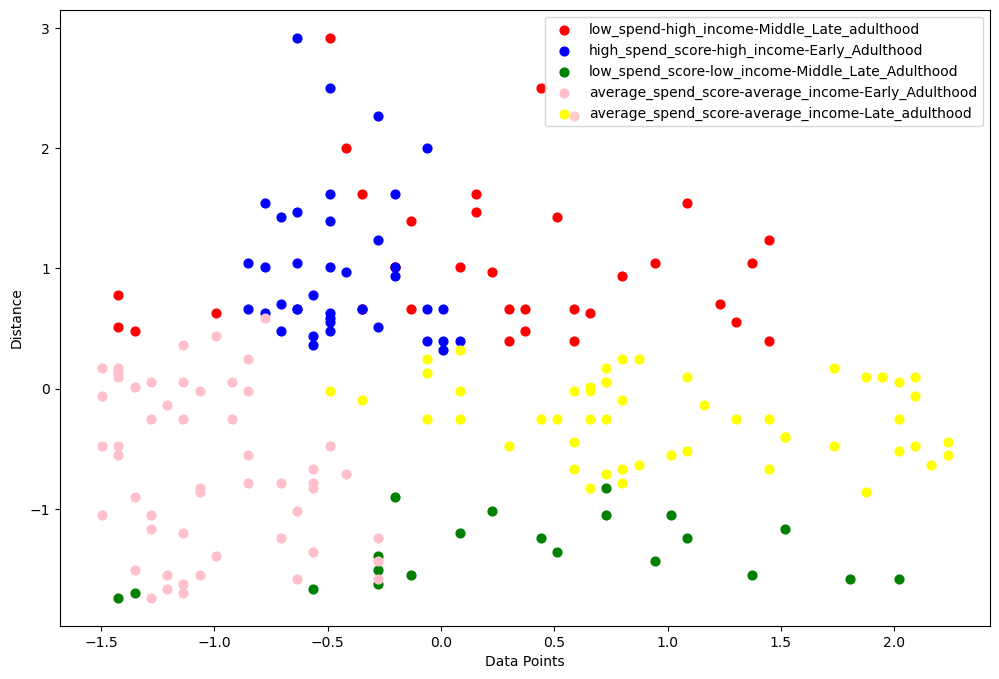

In [43]:
# Plotting Scatter plot
plt.figure(figsize=(12,8))
plt.scatter(X[y_hc==0,0],X[y_hc==0,1],s=40,c='red',label='low_spend-high_income-Middle_Late_adulthood')
plt.scatter(X[y_hc==1,0],X[y_hc==1,1],s=40,c='blue',label='high_spend_score-high_income-Early_Adulthood')
plt.scatter(X[y_hc==2,0],X[y_hc==2,1],s=40,c='green',label='low_spend_score-low_income-Middle_Late_Adulthood')
plt.scatter(X[y_hc==3,0],X[y_hc==3,1],s=40,c='pink',label='average_spend_score-average_income-Early_Adulthood')
plt.scatter(X[y_hc==4,0],X[y_hc==4,1],s=40,c='yellow',label='average_spend_score-average_income-Late_adulthood')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Distance');

# DBSCAN Model for Clustering

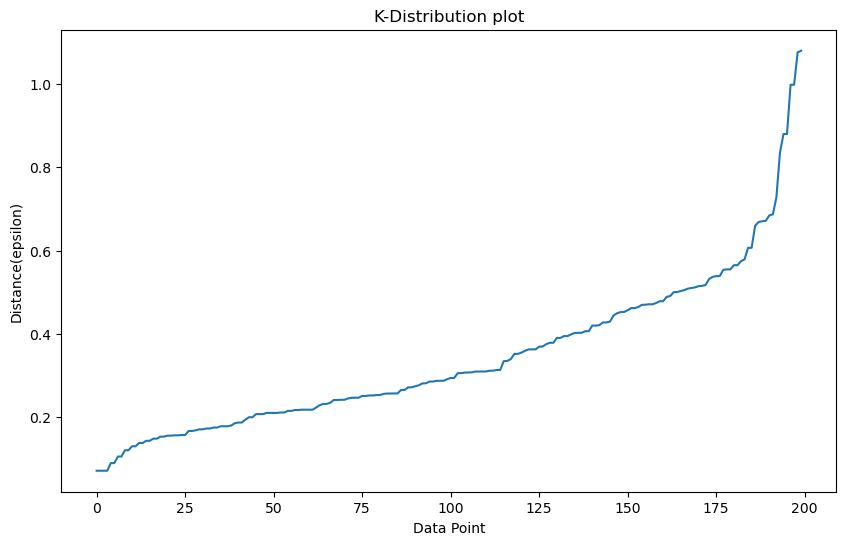

In [44]:
#evaluate the dbscan
from sklearn.neighbors import NearestNeighbors
neigh=NearestNeighbors(n_neighbors=2)
nrbr=neigh.fit(X)
distance,indices=nrbr.kneighbors(X)
#plotting k-distribution
distances=np.sort(distance,axis=0)
distances=distances[:,1]
plt.figure(figsize=(10,6))
plt.plot(distances)
plt.title("K-Distribution plot")
plt.xlabel('Data Point')
plt.ylabel('Distance(epsilon)')
plt.show()

The epsilon value is 0.6 as per above figure.

In [45]:
#Selecting min_sample
eps=0.6
for min_sample in range(4,20):
    clus= DBSCAN(eps=eps,min_samples=min_sample)
    clus_lbl=clus.fit_predict(X)
    x1=clus_lbl+2
    y1=np.bincount(x1)
    ii=np.nonzero(y1)[0]
    results=list(zip(ii,y1[ii]))
    print('eps=',eps,'min_sample=',min_sample,'clustered=',results)

eps= 0.6 min_sample= 4 clustered= [(1, 39), (2, 58), (3, 7), (4, 9), (5, 22), (6, 10), (7, 12), (8, 19), (9, 4), (10, 8), (11, 4), (12, 4), (13, 4)]
eps= 0.6 min_sample= 5 clustered= [(1, 62), (2, 57), (3, 6), (4, 5), (5, 4), (6, 22), (7, 9), (8, 10), (9, 18), (10, 7)]
eps= 0.6 min_sample= 6 clustered= [(1, 83), (2, 10), (3, 6), (4, 43), (5, 22), (6, 9), (7, 17), (8, 10)]
eps= 0.6 min_sample= 7 clustered= [(1, 98), (2, 9), (3, 20), (4, 19), (5, 12), (6, 7), (7, 8), (8, 17), (9, 10)]
eps= 0.6 min_sample= 8 clustered= [(1, 111), (2, 8), (3, 18), (4, 19), (5, 9), (6, 8), (7, 17), (8, 10)]
eps= 0.6 min_sample= 9 clustered= [(1, 137), (2, 18), (3, 19), (4, 9), (5, 17)]
eps= 0.6 min_sample= 10 clustered= [(1, 147), (2, 18), (3, 18), (4, 17)]
eps= 0.6 min_sample= 11 clustered= [(1, 156), (2, 18), (3, 11), (4, 15)]
eps= 0.6 min_sample= 12 clustered= [(1, 170), (2, 16), (3, 14)]
eps= 0.6 min_sample= 13 clustered= [(1, 173), (2, 13), (3, 14)]
eps= 0.6 min_sample= 14 clustered= [(1, 186), (2, 14)

With epsilon value as 6 the optimum min sample value is 10.

In [46]:
# DBSCAN
from sklearn.cluster import DBSCAN  
db=DBSCAN(eps=0.6,min_samples=10)
db.fit(X)  
print(silhouette_score(X,db.labels_)*100)

-9.656816578837322


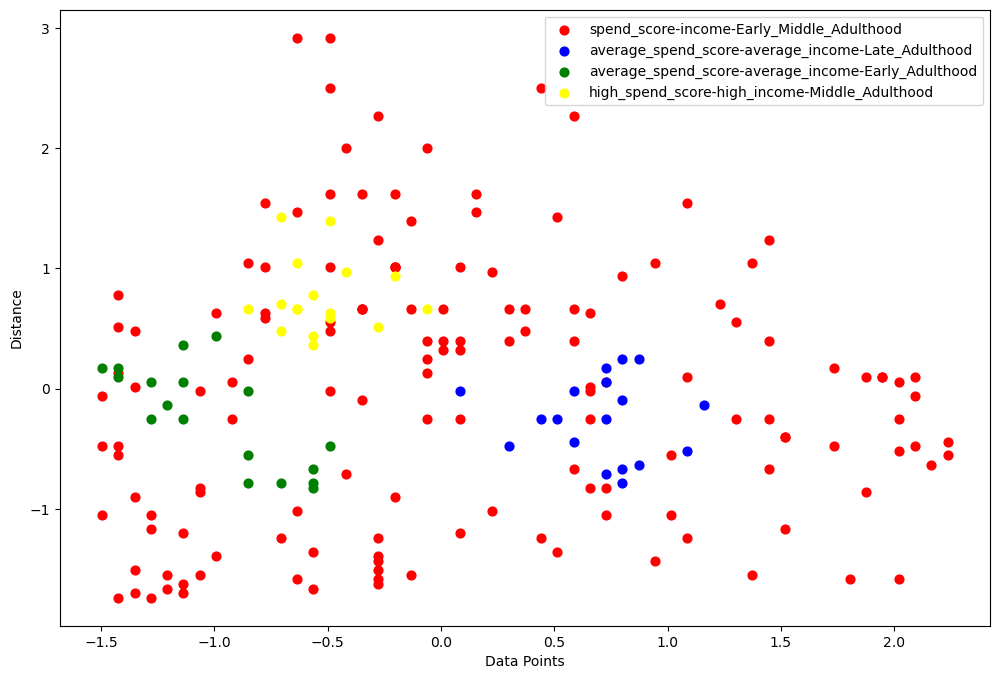

In [47]:
# Plotting Scatter plot
plt.figure(figsize=(12,8))
plt.scatter(X[db.labels_==-1,0],X[db.labels_==-1,1],s=40,c='red',label='spend_score-income-Early_Middle_Adulthood')
plt.scatter(X[db.labels_==0,0],X[db.labels_==0,1],s=40,c='blue',label='average_spend_score-average_income-Late_Adulthood')
plt.scatter(X[db.labels_==1,0],X[db.labels_==1,1],s=40,c='green',label='average_spend_score-average_income-Early_Adulthood')
plt.scatter(X[db.labels_==2,0],X[db.labels_==2,1],s=40,c='yellow',label='high_spend_score-high_income-Middle_Adulthood')
plt.legend()
plt.xlabel('Data Points')
plt.ylabel('Distance');

# Models Conclusion

In [48]:
mall['Kmeans']=y_km
mall['Anglomerative']=y_hc
mall['DBSCAN']=db.labels_

In [49]:
mall

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Kmeans,Anglomerative,DBSCAN
0,1,1,19,15,39,5,2,-1
1,2,1,21,15,81,5,3,-1
2,3,0,20,16,6,3,2,-1
3,4,0,23,16,77,5,3,-1
4,5,0,31,17,40,3,2,-1
...,...,...,...,...,...,...,...,...
195,196,0,35,120,79,1,1,-1
196,197,0,45,126,28,4,0,-1
197,198,1,32,126,74,1,1,-1
198,199,1,32,137,18,4,0,-1


# As per the plot and the silhouette score we can compare the graphs and conclude that KMeans algorithm is the best model for clustering of the Mall Customers dataset.

In [50]:
mall['Kmeans'].value_counts()

0    45
1    39
2    38
4    34
5    23
3    21
Name: Kmeans, dtype: int64

# We can say the 3rd cluster with average_spend_score-average_income-Late_Adulthood have highest number of customers.For new offers the mall should target cluster 4 first which have high_spend-high_income-Middle_Adulthood and then cluster 3 of average_spend_score-average_income-Late_Adulthood